Results are obtained via Metropolis_MC.py file which used LS_Algorithm.py file to calculate an error E

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [64]:
# df = pd.read_csv("wandb_export_2022-08-23T23_07_58.967+03_00.csv")
df = pd.read_csv("wandb_export_2022-09-02T18_31_56.380+03_00.csv")

In [65]:
# this accepted and rejected are probabilities of accepting / rejecting shift in situation where it shifts to  a free unoccupied location  
df['accepted']=df['Statistics/accepted']/(10**4-df['Statistics/no_neighbors']-df['Statistics/occupied'])
df['rejected']=df['Statistics/rejected']/(10**4-df['Statistics/no_neighbors']-df['Statistics/occupied'])

In [61]:
df.head()

,Name,ID,State,Runtime,N_sensors,T,steps,Best sensor location,E/Emin,E/acceptance probability,Statistics/accepted,Statistics/no_neighbors,Statistics/occupied,Statistics/rejected,accepted,rejected,E_scaled,accepted2
0,eager-morning-114,3n9w4env,finished,108098,5,0.00050,10000,"[28,126,123,179,111]",0.044531,9.923922e-01,3801,0,4,6195,0.380252,0.619748,5.365219,0.3801
1,soft-sun-113,30fz5q25,finished,105978,10,0.00050,10000,"[0,128,93,178,116,108,136,69,112,219]",0.018869,6.125955e-05,5249,0,372,4379,0.545181,0.454819,2.273408,0.5249
2,swift-paper-112,o35pu4z8,finished,97959,50,0.00005,10000,"{""bins"":[0,9.65625,19.3125,28.96875,38.625,48....",0.013911,2.898555e-16,4729,205,1163,3903,0.547845,0.452155,1.676024,0.4729
3,polished-wave-111,2rg4y61w,finished,101452,25,0.00005,10000,"[0,72,22,67,239,249,119,108,20,152,121,137,128...",0.008183,9.835042e-01,4918,412,569,4101,0.545293,0.454707,0.985961,0.4918
4,solar-sun-110,1ng9ievf,finished,94029,50,0.00010,10000,"{""bins"":[0,9.40625,18.8125,28.21875,37.625,47....",0.007682,2.350954e-04,5819,202,1582,2397,0.708252,0.291748,0.925555,0.5819


Results for 310 sensors are: E = 0.0083

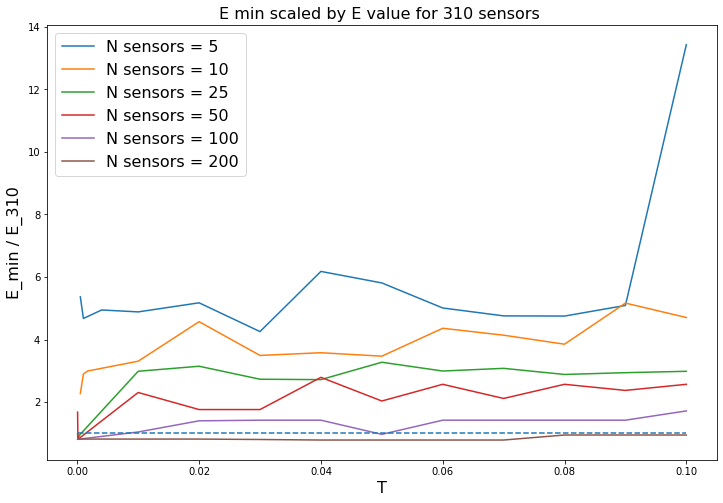

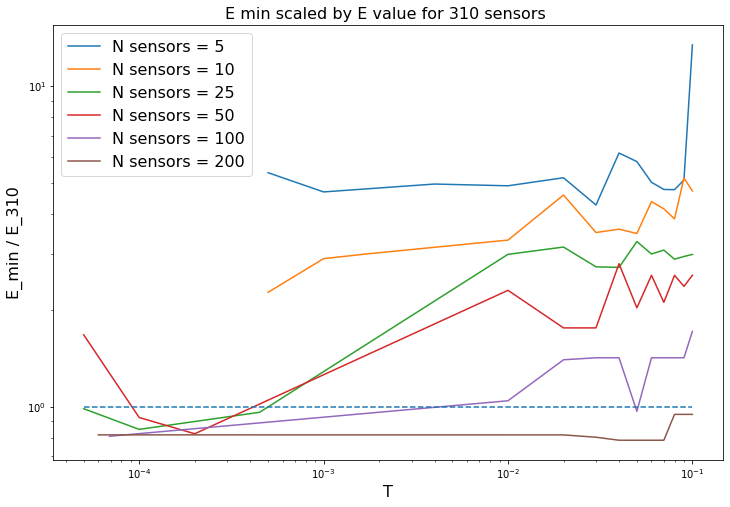

In [54]:
Best_E = 0.0083 # for max number od sensors
df['E_scaled'] = df['E/Emin']/Best_E
for yscale in ['linear', 'log']:
    plt.figure(figsize=(12,8))
    plt.title("E min scaled by E value for 310 sensors ", fontsize=16)
    for N_sensors in [5, 10, 25, 50, 100, 200]:
        df_temp =  df[df.N_sensors==N_sensors].sort_values(by=['T'])
        plt.plot(df_temp['T'], df_temp['E_scaled'], label=f'N sensors = {N_sensors}')
    plt.xlabel('T', fontsize=16)
    plt.ylabel('E_min / E_310', fontsize=16)
    plt.yscale(yscale)
    plt.xscale(yscale)
    plt.legend(fontsize=16)
    plt.hlines(1,5e-5,0.1, linestyles='dashed' )
    plt.show()

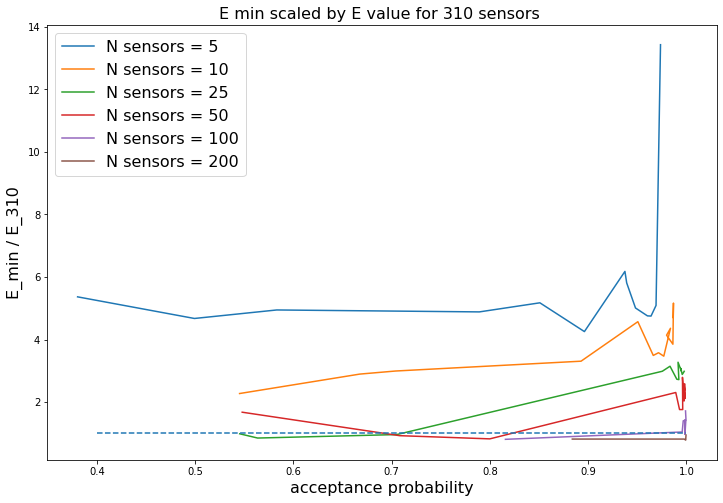

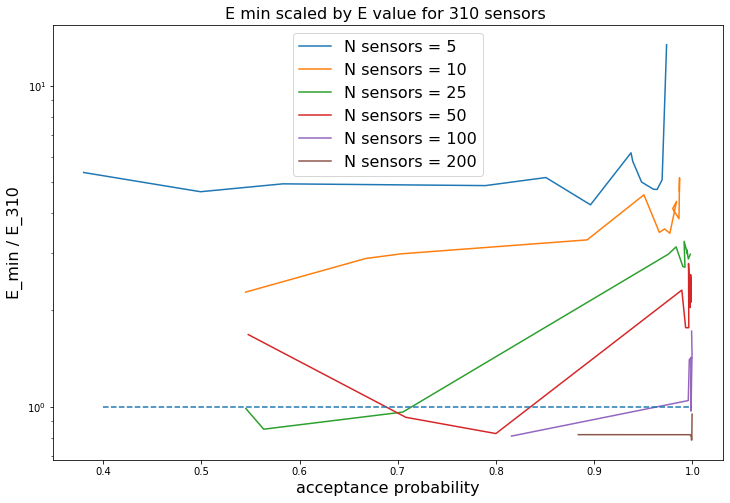

In [63]:
for yscale in ['linear', 'log']:
    plt.figure(figsize=(12,8))
    plt.title("E min scaled by E value for 310 sensors ", fontsize=16)
    for N_sensors in [5, 10, 25, 50, 100, 200]:
        df_temp =  df[df.N_sensors==N_sensors].sort_values(by=['T'])
        plt.plot(df_temp['accepted'], df_temp['E_scaled'], label=f'N sensors = {N_sensors}')
    plt.xlabel('acceptance probability', fontsize=16)
    plt.ylabel('E_min / E_310', fontsize=16)
    plt.yscale(yscale)
    plt.legend(fontsize=16)
    plt.hlines(1,0.4,1, linestyles='dashed')
    plt.show()

In [56]:
# Best sensor location for 25 sensors

# df.sort_values('E/Emin')[df.N_sensors==25]['Best sensor location'].iloc[0]

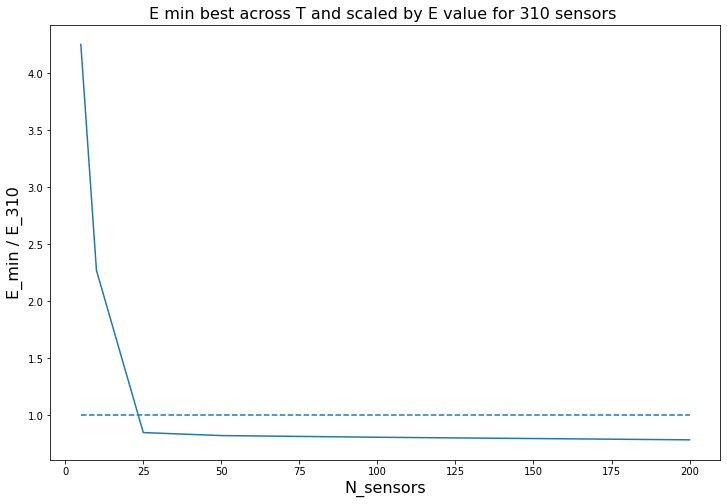

In [57]:
df_temp =  df.groupby(['N_sensors']).min().reset_index()
plt.figure(figsize=(12,8))
plt.title("E min best across T and scaled by E value for 310 sensors ", fontsize=16)
plt.plot(df_temp['N_sensors'], df_temp['E_scaled'])
plt.xlabel('N_sensors', fontsize=16)
plt.ylabel('E_min / E_310', fontsize=16)
# plt.yscale(yscale)
# plt.legend(fontsize=16)
plt.hlines(1,5,200, linestyles='dashed' )
plt.show()

In [58]:
# plt.figure(figsize=(12,8))
# plt.title("probability of sensor relocation acception for situations where sensor could be relocated \n(the chosen new location exists and is not occupied)", fontsize=16)
# for N_sensors in [5, 10, 25, 50, 100, 200]:
#     df_temp =  df[df.N_sensors==N_sensors].sort_values(by=['T'])
#     plt.plot(df_temp['T'], df_temp['accepted'], label=f'N sensors = {N_sensors}')
# plt.xlabel('T', fontsize=16)
# plt.ylabel('probability of sensor relocation acception', fontsize=16)
# plt.legend(fontsize=16)
# plt.xscale('log')
# plt.show()

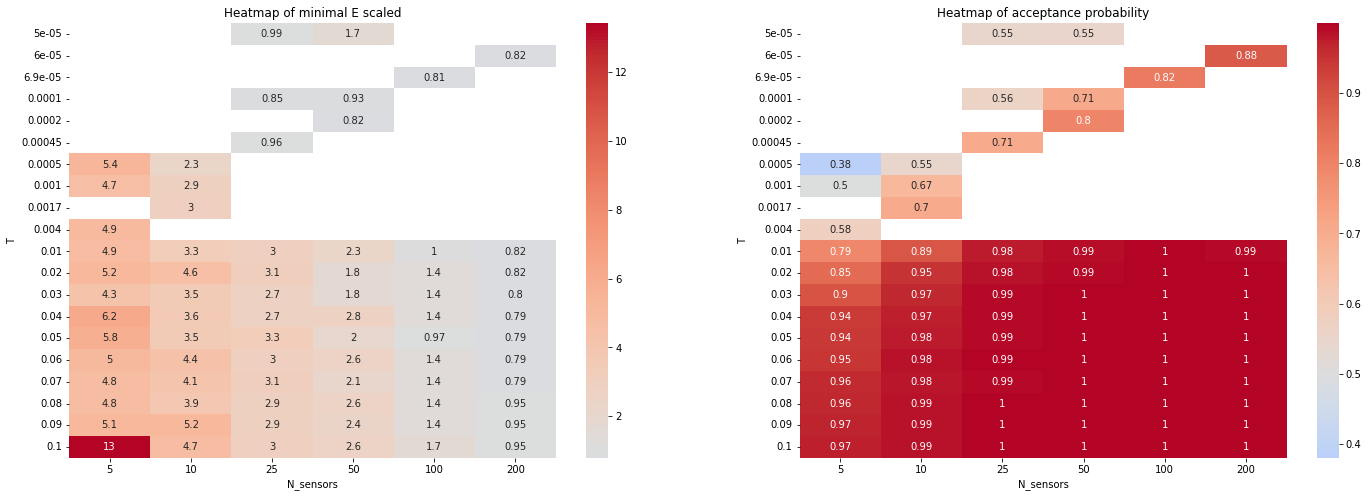

In [59]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(24,8))
df_new = df.pivot(index='T',columns='N_sensors',values='E_scaled')
sns.heatmap(ax=axs[0],data=df_new, annot=True, center=1, cmap='coolwarm')
axs[0].set_title("Heatmap of minimal E scaled")
df_new = df.pivot(index='T',columns='N_sensors',values='accepted')
sns.heatmap(ax=axs[1],data=df_new, annot=True, center = 0.5, cmap='coolwarm')
axs[1].set_title("Heatmap of acceptance probability")
plt.show()